## Discourse Marker QA: Multiple Choice

Dataset Source: https://huggingface.co/datasets/sileod/discourse_marker_qa

#### Install Necessary Libraries

In [1]:
%pip install pip -U
%pip install torch datasets
%pip install transformers tensorboard
%pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/46/3e/e1a12ac147ad460f67bd59ce9fede8470be4fa7e5b27dc53ba87135c6c15/datasets-2.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for dill<0.3.8,>=0.3.0 from https://files.pythonhosted.org/packages/f5/3a/74a29b11cf2cdfcd6ba89c0cecd70b37cd1ba7b77978ce611eb7a146a832/dill-0.3.7-py3-none-any.whl.metadata
  Obtaining dependency information for xxhash from https://files.pythonhosted.org/packages/13/c3/e942893f4864a424514c81640f114980cfd5aff7e7414d1e0255f4571111/xxhash-3.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for multiprocess from https://files.pythonhosted.org/packages/35/a8/36d8d7b3e46b377800d8dec47891

#### Enter HuggingFace Access Token

In [2]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


#### Import Necessary Libraries

In [3]:
import os, sys, random, ast
os.environ['TOKENIZERS_PARALLELISM']='false'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datasets
from datasets import Dataset, DatasetDict, load_dataset

import torch

from dataclasses import dataclass

import transformers
from transformers import AutoTokenizer, AutoModelForMultipleChoice
from transformers import Trainer, TrainingArguments, set_seed
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy

from typing import Optional, Union

!git lfs install

Git LFS initialized.


#### Display Library Versions

In [4]:
print("Python:".rjust(15), sys.version[0:6])
print("NumPy:".rjust(15), np.__version__)
print("Pandas:".rjust(15), pd.__version__)
print("Torch:".rjust(15), torch.__version__)
print("Datasets:".rjust(15), datasets.__version__)
print("Transformers:".rjust(15), transformers.__version__)

        Python: 3.10.1
         NumPy: 1.22.4
        Pandas: 1.5.3
         Torch: 2.0.1+cu118
      Datasets: 2.14.2
  Transformers: 4.31.0


#### Load Dataset & Convert To Pandas DataFrame

In [5]:
data = load_dataset("sileod/discourse_marker_qa")

data = data.rename_columns({
    "label": "labels",
    "answer_0": "0",
    "answer_1": "1",
    "answer_2": "2",
    "answer_3": "3",
    "answer_4": "4",
    "answer_5": "5",
    "answer_6": "6",
    "answer_7": "7",
    "answer_8": "8",
    "answer_9": "9",
    })

data.set_format(type="pandas")

df = data['test'][:]

df = df.dropna(how='all')

df = df.drop_duplicates()

df

Generating test split: 0 examples [00:00, ? examples/s]

,context,0,1,2,3,4,5,6,7,8,9,labels
0,"Here, however, a charging circuit is provides ...","Preferably, an amplifier within a current sens...","Namely, an amplifier within a current sensor i...","Absolutely, an amplifier within a current sens...","In the end, an amplifier within a current sens...","Secondly, an amplifier within a current sensor...","Normally, an amplifier within a current sensor...","Frequently, an amplifier within a current sens...","Technically, an amplifier within a current sen...","Eventually, an amplifier within a current sens...","Meaning, an amplifier within a current sensor ...",1
1,", it's about these orange shorts :.","Accordingly neither the shorts, nor I, made th...","This, neither the shorts, nor I, made the fina...","Because of this neither the shorts, nor I, mad...","Because of that neither the shorts, nor I, mad...","Interestingly, neither the shorts, nor I, made...","Unsurprisingly, neither the shorts, nor I, mad...","Preferably, neither the shorts, nor I, made th...","Sadly, neither the shorts, nor I, made the fin...","Afterward neither the shorts, nor I, made the ...","Lately, neither the shorts, nor I, made the fi...",7
2,The panel has considered the allegation by the...,"In particular, the Panel has considered the Co...","Again, the Panel has considered the Complainan...","Increasingly, the Panel has considered the Com...","Amazingly, the Panel has considered the Compla...","Once, the Panel has considered the Complainant...","Currently, the Panel has considered the Compla...","Realistically, the Panel has considered the Co...","Now, the Panel has considered the Complainant´...","Suddenly, the Panel has considered the Complai...","Historically, the Panel has considered the Com...",0
3,Smishing is sometimes referred to as``vishing ...,"Admittedly, a criminal begins by setting up an...","Frequently, a criminal begins by setting up an...","Regardless, a criminal begins by setting up an...","Perhaps, a criminal begins by setting up an au...","Realistically, a criminal begins by setting up...","Arguably, a criminal begins by setting up an a...","Typically, a criminal begins by setting up an ...","Curiously, a criminal begins by setting up an ...","Once, a criminal begins by setting up an autom...","Traditionally, a criminal begins by setting up...",6
4,Whitley and Nathan decide to forget about what...,"Probably, whitley can't seem to forget about t...","Eventually, whitley can't seem to forget about...","Meaning, whitley can't seem to forget about th...","Unfortunately, whitley can't seem to forget ab...",Accordingly whitley can't seem to forget about...,"Only, whitley can't seem to forget about that ...",Because of this whitley can't seem to forget a...,"Particularly, whitley can't seem to forget abo...",Furthermore whitley can't seem to forget about...,"Increasingly, whitley can't seem to forget abo...",5
...,...,...,...,...,...,...,...,...,...,...,...,...
852,My epic journey across the countryside was hel...,"Meantime, when I found a riftstone, I dismisse...","On the other hand when I found a riftstone, I ...","Thirdly, when I found a riftstone, I dismissed...","Likewise, when I found a riftstone, I dismisse...","Sadly, when I found a riftstone, I dismissed h...","Later, when I found a riftstone, I dismissed h...","Specifically, when I found a riftstone, I dism...","Undoubtedly, when I found a riftstone, I dismi...","Surprisingly, when I found a riftstone, I dism...","Frequently, when I found a riftstone, I dismis...",5
853,"Alfred Molina, who plays Viggo, also starred w...","Overall, the film premiered the same year as H...","Plus, the film premiered the same year as How ...","Sadly, the film premiered the same year as How...","Secondly, the film premiered the same year as ...","Coincidentally, the film premiered the same ye...","Notably, the film premiered the same year as H...","Presumably, the film premiered the same year a...",Accordingly the film premiered the same year a...,"Lastly, the

#### Visual: Word Length of Training Dataset Inputs

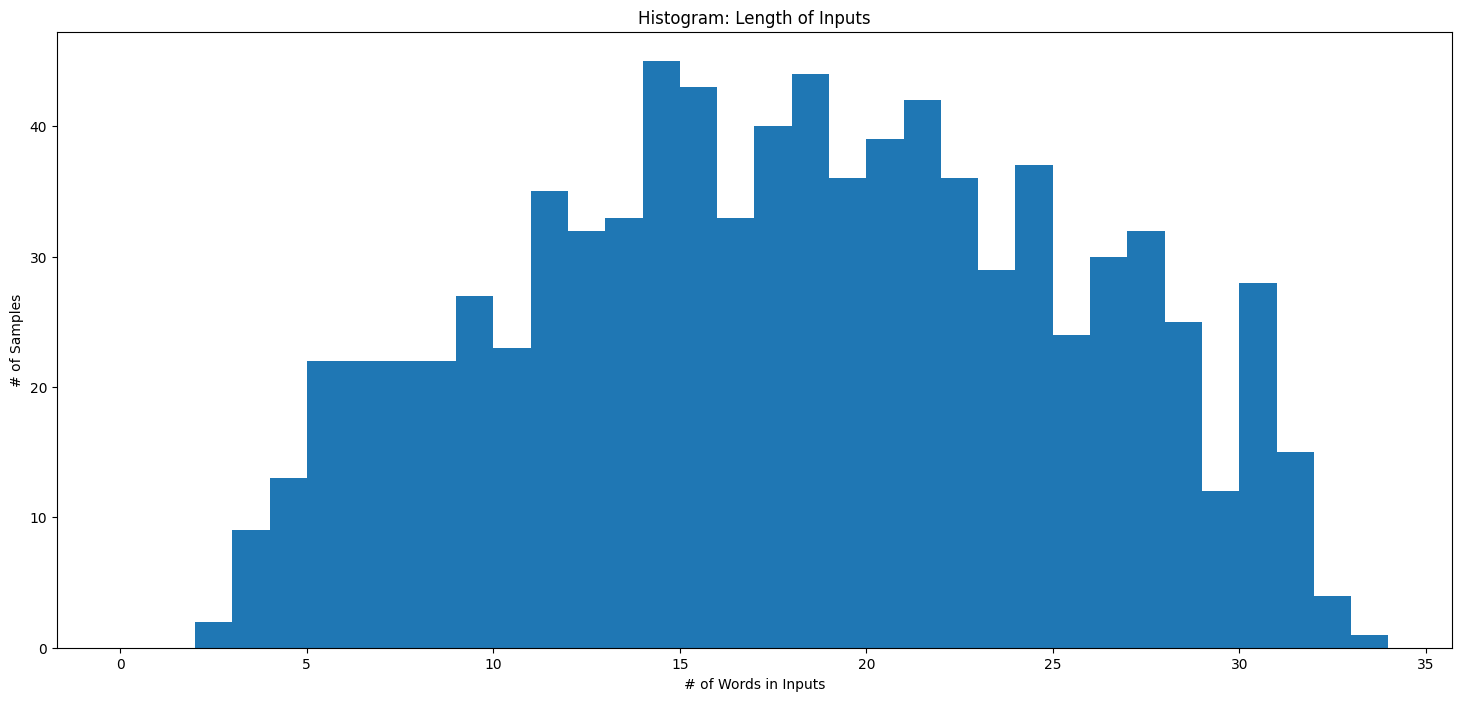

The maximum length of inputs is 33 words.


In [6]:
df['input_length'] = df['context'].str.split().str.len()

n_bin = max(df['input_length']) + 1
df.hist('input_length', grid=False, figsize=(18,8), range=(0,n_bin), bins=n_bin)
plt.title('Histogram: Length of Inputs')
plt.xlabel('# of Words in Inputs')
plt.ylabel('# of Samples')
plt.show()

print(f"The maximum length of inputs is {max(df['input_length'])} words.")

df = df.drop(columns=['input_length'])

#### Convert from DataFrame to Dataset & Split into Training/Testing/Evaluation Datasets

In [7]:
dataset = Dataset.from_pandas(df)

train_testeval = dataset.train_test_split(test_size=0.18)
test_eval = train_testeval['test'].train_test_split(test_size=0.25)

ds = DatasetDict({
    'train' : train_testeval['train'],
    'test' : test_eval['train'],
    'eval' : test_eval['test'],
})

print("Training Dataset Shape:", ds['train'].shape)
print("Testing Dataset Shape:", ds['test'].shape)
print("Evaluation Dataset Shape:", ds['eval'].shape)

print(ds['train'].features)

Training Dataset Shape: (702, 13)
Testing Dataset Shape: (116, 13)
Evaluation Dataset Shape: (39, 13)
{'context': Value(dtype='string', id=None), '0': Value(dtype='string', id=None), '1': Value(dtype='string', id=None), '2': Value(dtype='string', id=None), '3': Value(dtype='string', id=None), '4': Value(dtype='string', id=None), '5': Value(dtype='string', id=None), '6': Value(dtype='string', id=None), '7': Value(dtype='string', id=None), '8': Value(dtype='string', id=None), '9': Value(dtype='string', id=None), 'labels': Value(dtype='int32', id=None), '__index_level_0__': Value(dtype='int64', id=None)}


#### Display Example

In [8]:
ds['train'][12]

{'context': 'I lost my parents when I was sent away partly and probably for safety from a war-torn country (highest crime rate in the world).',
 '0': "Because of that i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.",
 '1': "Really, i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.",
 '2': "Currently, i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.",
 '3': "Soon, i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.",
 '4': "Hopefully, i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.",
 '5': "Admittedly, i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.",
 '6': "Thus, i've always felt like an outs

#### Create Function to Display an Example Sample

In [9]:
def show_one_example(sample):
    print(f"Context: {sample['context']}")
    print(f"Option 0: {sample['0']}")
    print(f"Option 1: {sample['1']}")
    print(f"Option 2: {sample['2']}")
    print(f"Option 3: {sample['3']}")
    print(f"Option 4: {sample['4']}")
    print(f"Option 5: {sample['5']}")
    print(f"Option 6: {sample['6']}")
    print(f"Option 7: {sample['7']}")
    print(f"Option 8: {sample['8']}")
    print(f"Option 9: {sample['9']}")
    print(f"\nGround Truth: Option {sample['labels']}")

#### Display an Example Sample

In [10]:
show_one_example(ds['train'][12])

Context: I lost my parents when I was sent away partly and probably for safety from a war-torn country (highest crime rate in the world).
Option 0: Because of that i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.
Option 1: Really, i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.
Option 2: Currently, i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.
Option 3: Soon, i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.
Option 4: Hopefully, i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.
Option 5: Admittedly, i've always felt like an outsider and have always traveled trying to find my place in the world and where I fit in.
Option 6: Thus, i've always felt like an o

#### Basic Values/Constants

In [11]:
MODEL_CKPT = "bert-base-uncased"
MODEL_NAME = MODEL_CKPT.split("/")[-1] + "-Discourse_Marker_QA"

STRATEGY = "epoch"
LEARNING_RATE = 5e-5

BATCH_SIZE = 16
NUM_OF_EPOCHS = 20

WEIGHT_DECAY = 0.01
REPORTS_TO = "tensorboard"

set_seed = 42

#### Instantiate Tokenizer

In [12]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_CKPT,
                                          use_fast=True)

#### Create Preprocessing Function

In [13]:
ending_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

def preprocess_function(samples):
    input_headers = samples["context"]
    input = [[f"{header} {samples[end][i]}" for end in ending_names] for i, header in enumerate(input_headers)]

    input = sum(input, [])

    tokenized_samples = tokenizer(input, truncation=True)

    return {k: [v[i:i + len(ending_names)] for i in range(0, len(v), len(ending_names))]
            for k, v in tokenized_samples.items()}

#### Apply Preprocessing Function to Dataset

In [14]:
encoded_ds = ds.map(preprocess_function,
                    batched=True)

Map:   0%|          | 0/702 [00:00<?, ? examples/s]

Map:   0%|          | 0/116 [00:00<?, ? examples/s]

Map:   0%|          | 0/39 [00:00<?, ? examples/s]

In [15]:
encoded_ds['train'].features

{'context': Value(dtype='string', id=None),
 '0': Value(dtype='string', id=None),
 '1': Value(dtype='string', id=None),
 '2': Value(dtype='string', id=None),
 '3': Value(dtype='string', id=None),
 '4': Value(dtype='string', id=None),
 '5': Value(dtype='string', id=None),
 '6': Value(dtype='string', id=None),
 '7': Value(dtype='string', id=None),
 '8': Value(dtype='string', id=None),
 '9': Value(dtype='string', id=None),
 'labels': Value(dtype='int32', id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), length=-1, id=None)}

#### Instantiate Model

In [16]:
model = AutoModelForMultipleChoice.from_pretrained(MODEL_CKPT)

Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Define TrainingArguments

In [17]:
args = TrainingArguments(
    output_dir=MODEL_NAME,
    evaluation_strategy=STRATEGY,
    save_strategy=STRATEGY,
    learning_rate=LEARNING_RATE,
    auto_find_batch_size=True,
    num_train_epochs=NUM_OF_EPOCHS,
    weight_decay=WEIGHT_DECAY,
    report_to=REPORTS_TO,
    logging_first_step=True,
    hub_private_repo=True,
    load_best_model_at_end=True,
    logging_steps=25,
    group_by_length=True,
    push_to_hub=True
)

#### Define Data Collator Class

In [18]:
@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad inputs
    for the multiple choices received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()}
                               for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])

        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )

        # Unflatten
        batch = {k: v.view(batch_size,
                           num_choices,
                           -1)
                 for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels,
                                       dtype=torch.int64)
        return batch

#### Create Function to Compute Metrics

In [19]:
def compute_metrics(predictions):
    preds, labels = predictions
    preds = np.argmax(preds, axis=1)
    return {"accuracy": (preds == labels).astype(np.float32).mean().item()}

#### Instantiate Trainer

In [20]:
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=encoded_ds["train"],
    eval_dataset=encoded_ds["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

Cloning https://huggingface.co/DunnBC22/bert-base-uncased-Discourse_Marker_QA into local empty directory.


#### Train Model

In [21]:
train_results = trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,1.917400,1.710502,0.387931
2,1.088900,1.502229,0.482759
3,0.517900,1.507482,0.568965
4,0.227100,2.440201,0.491379
5,0.164100,2.103619,0.568965
6,0.053700,2.633247,0.500000
7,0.035600,2.763919,0.560345
8,0.042800,2.366212,0.603448
9,0.007300,2.646668,0.594828
10,0.001600,2.503780,0.603448


#### Push to HuggingFace Hub

In [22]:
trainer.push_to_hub()

Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file runs/Aug02_20-33-06_1020a9ac92b7/events.out.tfevents.1691008404.1020a9ac92b7.267.0:   0%|         …

To https://huggingface.co/DunnBC22/bert-base-uncased-Discourse_Marker_QA
   3c49a49..6ca21b8  main -> main

   3c49a49..6ca21b8  main -> main

To https://huggingface.co/DunnBC22/bert-base-uncased-Discourse_Marker_QA
   6ca21b8..b23a5ba  main -> main

   6ca21b8..b23a5ba  main -> main



'https://huggingface.co/DunnBC22/bert-base-uncased-Discourse_Marker_QA/commit/6ca21b8a5e8ad87e1527243fc54b3ec9af1eb9ed'

#### Save & Log Model

In [23]:
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

***** train metrics *****
  epoch                    =       20.0
  total_flos               =  4789623GF
  train_loss               =      0.214
  train_runtime            = 0:44:02.89
  train_samples_per_second =      5.312
  train_steps_per_second   =      0.666


### Notes & Other Takeaways From This Project
****
- While each sample has 10 different answer options, I was expected better results.

****

#### Citation
- Model Checkpoint

    > @article{DBLP:journals/corr/abs-1810-04805, author = {Jacob Devlin and Ming{-}Wei Chang and Kenton Lee and Kristina Toutanova}, title = {{BERT:} Pre-training of Deep Bidirectional Transformers for Language Understanding}, journal = {CoRR}, volume = {abs/1810.04805}, year = {2018}, url = {http://arxiv.org/abs/1810.04805%7D, archivePrefix = {arXiv}, eprint = {1810.04805}, timestamp = {Tue, 30 Oct 2018 20:39:56 +0100}, biburl = {https://dblp.org/rec/journals/corr/abs-1810-04805.bib%7D, bibsource = {dblp computer science bibliography, https://dblp.org%7D}